<h1> Data structures programming exercise </h1>
<h2> (Advanced) Data Structures Summer 2020 </h2>
<h3> Prof. Dr. László Kozma, Katharina Klost </h3>
<h4> Authors: Yumeng Li & Wael Amayri </h4>

**Skew (self-adjusting) heaps**

Implement the skew heap data structure discussed in the lecture. Test its
efficiency on some reasonably large input.
For instance, you may insert n random keys, then extract the minimum n times,
thereby sorting the input. Check how the running time increases with the input
size. (You need not measure actual “wallclock” running time, you can instead
count elementary comparison and link operations.) Plot the results.
Try one or two variants of the algorithm and test experimentally how their
performance compares with the original. Some ideas: when you go up the merge
path and flip left/right children, do not go all the way to the root, only flip up
to some point. Or flip a biased coin to decide at each node whether to flip or
not. Experiment with different approaches and summarize your findings.


<h1> Implementation </h1>


<h4> Using Binarytree library: </h4>
We will use the class "Node" in the Binarytree library that will allow us to easily visulaize our heap

<h6> Installation: </h6>
To install a stable version from PyPi:


In [1]:
pip install binarytree

Note: you may need to restart the kernel to use updated packages.


For more information about Binarytree library see https://pypi.org/project/binarytree/


<h6> Importing class "Node" from binarytree </h6>

In [2]:
import importlib
from binarytree import Node
import skewheap
importlib.reload(skewheap)

<module 'skewheap' from '/Users/zhijiang/Desktop/Skewheap/skewheap.py'>

<h4> Simple test </h4>
insert 5, 10, 3, 7 into the heap

In [3]:
myHeap = skewheap.SkewHeap(None, True)
myHeap.insert(Node(5))
node10 = Node(10)
myHeap.insert(node10)
myHeap.insert(Node(3))
myHeap.insert(Node(7))
print(myHeap)

insert 5
Melding None and 
5

After merging the right spines: 
5

insert 10
Melding 
5
 and 
10

After merging the right spines: 
5
 \
  10

After swapping children of node 5:

  _5
 /
10

insert 3
Melding 
  _5
 /
10
 and 
3

After merging the right spines: 
3___
    \
    _5
   /
  10

After swapping children of node 3:

     3
    /
  _5
 /
10

insert 7
Melding 
     3
    /
  _5
 /
10
 and 
7

After merging the right spines: 
     3
    / \
  _5   7
 /
10

After swapping children of node 3:

  3___
 /    \
7     _5
     /
    10


  3___
 /    \
7     _5
     /
    10



decrease key for node 10 to become 4

In [4]:
myHeap.decrease_key(node10, 4)


decrease key of node 10 to 4
cut out the node and its subtree
Melding 
  3
 / \
7   5
 and 
4

After merging the right spines: 
  3
 / \
7   4
     \
      5

After swapping children of node 4:

  3__
 /   \
7     4
     /
    5

After swapping children of node 3:

    3
   / \
  4   7
 /
5



extract min:

In [5]:
myHeap.extract_min()

extract min: returns 3
Melding 
  4
 /
5
 and 
7

After merging the right spines: 
  4
 / \
5   7

After swapping children of node 4:

  4
 / \
7   5



Node(3)

<h4> Example from the lecture </h4>

In [6]:
n11 = Node(11, Node(16))
n9 = Node(9, Node(13), n11)
n15 = Node(15, Node(21), Node(20))
n7 = Node(7, n15)
n3 = Node(3, Node(6))
n5 = Node(5, n7, n9)
root = Node(1, n3, n5)

heapExampleFromTheLecture = skewheap.SkewHeap(root, visualizeSteps = True, flipProbability = 1)

root2 = Node(4, Node(10), Node(8))
heapExampleFromTheLecture2 = skewheap.SkewHeap(root2)

print("H1: {h1} H2: {h2}\nMelding them together:".format(h1 = heapExampleFromTheLecture, h2 = heapExampleFromTheLecture2))
heapExampleFromTheLecture.meld(heapExampleFromTheLecture2)
print("# comparison operations = {}, # flip operations = {}".format(heapExampleFromTheLecture.comparisonsOperationsCount, heapExampleFromTheLecture.flipOperationsCount))


H1: 
    1___________
   /            \
  3              5___
 /              /    \
6          ____7     _9___
          /         /     \
        _15        13     _11
       /   \             /
      21    20          16
 H2: 
  _4
 /  \
10   8

Melding them together:
Melding 
    1___________
   /            \
  3              5___
 /              /    \
6          ____7     _9___
          /         /     \
        _15        13     _11
       /   \             /
      21    20          16
 and 
  _4
 /  \
10   8

After merging the right spines: 
    1___
   /    \
  3     _4___________
 /     /             \
6     10              5
                     / \
                ____7   8___
               /            \
             _15            _9___
            /   \          /     \
           21    20       13     _11
                                /
                               16

After swapping children of node 9:

    1___
   /    \
  3     _4___________
 /     /          

<h3> Experimenting with an increasing input size. </h3>
 We will insert n random keys, then extract the minimum n times, thereby sorting the input.
 To check how the running time increases with the input size:
 
- For each _n_, we will perform *t* experiment
- We will decrease *t* when _n_ increases because of the running time
- In each experiment:
       - We sample n random integers
       - Create a heap of each variant
            (each chosen probability that we flip left/right children at some node gives a new variant.
            In the variant from the lecture we would flip with probability 1)
       - For each heap:
            insert n random keys, then extract the minimum n times, thereby sorting the input.
- We consider then for each variant the average of the *t* experiments with input size _n_ 
       

In [7]:
flipProbabilities = [1.0, .75, .50, .25, .10, .05, .01] # Each correspond to a variant
from numpy import random
import time

In [8]:
def experiment(n:int, t:int):
    
    numberOfVariants = len(flipProbabilities)
    average_wallclockRunningTimeInms = [0]*numberOfVariants
    average_comparisonsOperationsCount = [0]*numberOfVariants
    average_flipOperationsCount = [0]*numberOfVariants
    average_sumOfComparisonsOperationsCountAndFlipOperationsCount = [0]*numberOfVariants
    
    for iExperiment in range(t):
        nRandInt = random.randint(0, 10, size=n)
        #print("iExperiment: {}".format(nRandInt))
        
        for i in range(numberOfVariants):
            newHeap = skewheap.SkewHeap(None, False, flipProbabilities[i])
            
            # start time 
            start = time.time()
            for randInt in nRandInt:
                newHeap.insert(Node(randInt))   
            #print(newHeap)
            while (not newHeap.isEmpty()):
                extract_min = newHeap.extract_min()
            stop = time.time()
            
            average_wallclockRunningTimeInms[i] += (stop - start)
            average_comparisonsOperationsCount[i] += newHeap.comparisonsOperationsCount
            average_flipOperationsCount[i] += newHeap.flipOperationsCount
            average_sumOfComparisonsOperationsCountAndFlipOperationsCount[i] += (average_comparisonsOperationsCount[i] + average_flipOperationsCount[i])
            
    
    average_wallclockRunningTimeInms = [x*1000 / t for x in average_wallclockRunningTimeInms]
    average_comparisonsOperationsCount = [x / t for x in average_comparisonsOperationsCount]
    average_flipOperationsCount = [x / t for x in average_flipOperationsCount]
    average_sumOfComparisonsOperationsCountAndFlipOperationsCount = [x / t for x in average_sumOfComparisonsOperationsCountAndFlipOperationsCount]
    
    return average_wallclockRunningTimeInms, average_comparisonsOperationsCount, average_flipOperationsCount, average_sumOfComparisonsOperationsCountAndFlipOperationsCount
            

In [9]:
#inputSizes = [10**2, 10**3, 10**4, 10**5, 10**6]
inputSizes = [10**2, 10**3]
averages_wallclockRunningTimeInms = []
averages_comparisonsOperationsCount = []
averages_flipOperationsCount = []
averages_sumOfComparisonsOperationsCountAndFlipOperationsCount = []
t = 100
for n in inputSizes:
    t = int(t/2)
    average_wallclockRunningTimeInms, average_comparisonsOperationsCount, average_flipOperationsCount, average_sumOfComparisonsOperationsCountAndFlipOperationsCount = experiment(n, t)
    averages_wallclockRunningTimeInms.append(average_wallclockRunningTimeInms)
    averages_comparisonsOperationsCount.append(average_comparisonsOperationsCount)
    averages_flipOperationsCount.append(average_flipOperationsCount)
    averages_sumOfComparisonsOperationsCountAndFlipOperationsCount.append(average_sumOfComparisonsOperationsCountAndFlipOperationsCount)
    

<h4> Plotting the result </h4>

In [10]:
import matplotlib.pyplot as plt
inputSizesAsStrings = [str(n) for n in inputSizes]

<h5> Average wallclock running time in ms </h5>

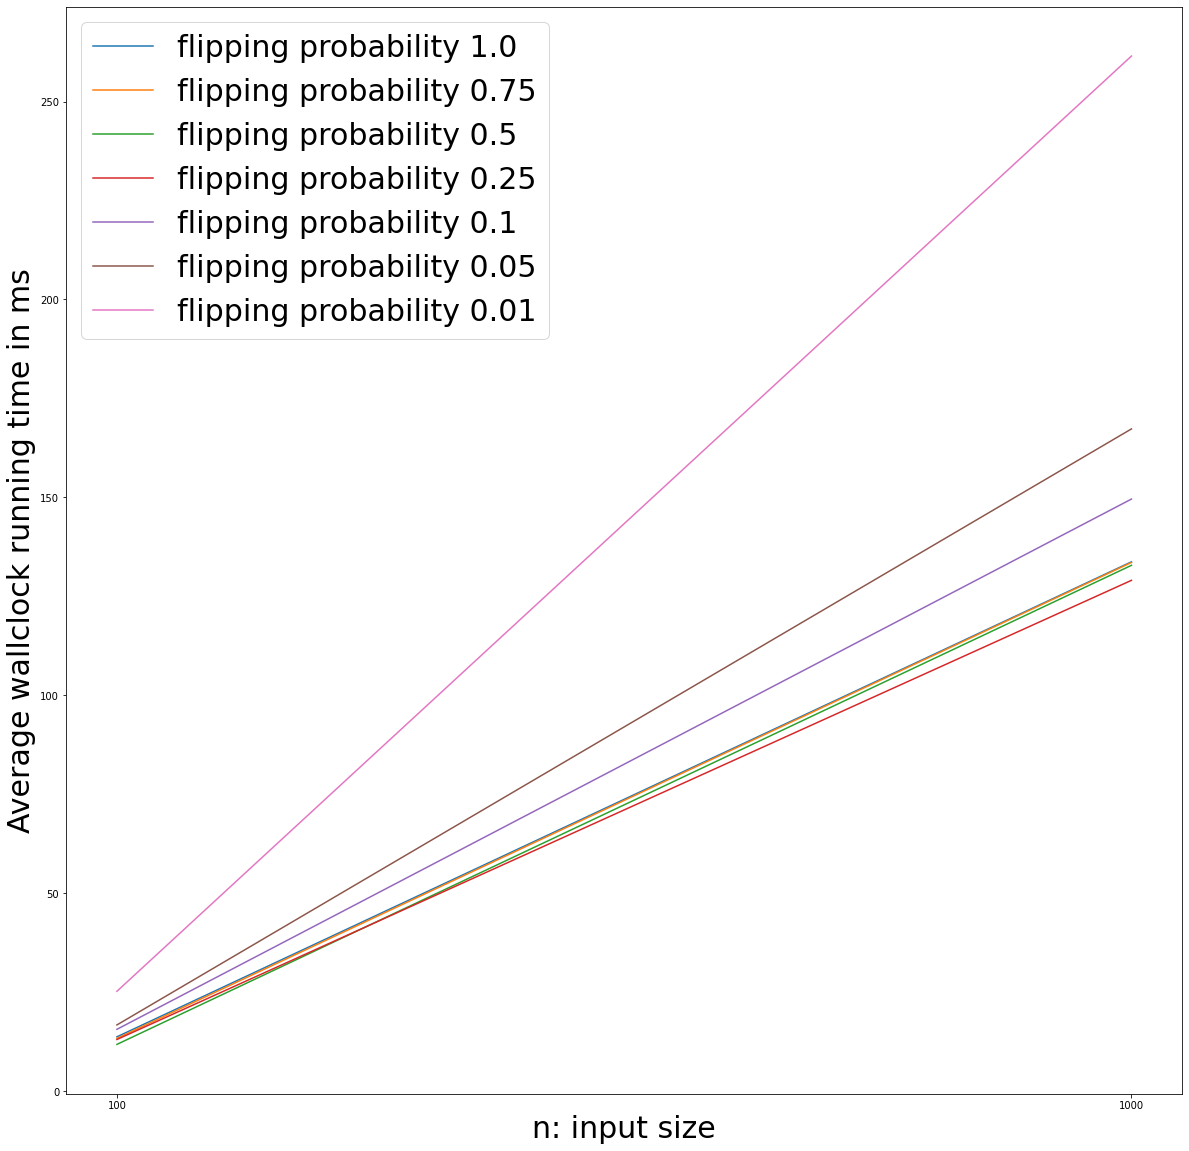

In [11]:
plt.figure(1, figsize=(20,20))
for i in range(len(flipProbabilities)):
    y = [average[i] for average in averages_wallclockRunningTimeInms]
    plt.plot(inputSizesAsStrings, y, label ="flipping probability {}".format(flipProbabilities[i]))
plt.xlabel('n: input size', fontsize = 30)
plt.ylabel('Average wallclock running time in ms', fontsize = 30)
plt.legend(prop={'size': 30})
plt.show()

<h5> Average sum of comparison operations count and flip operations count </h5>

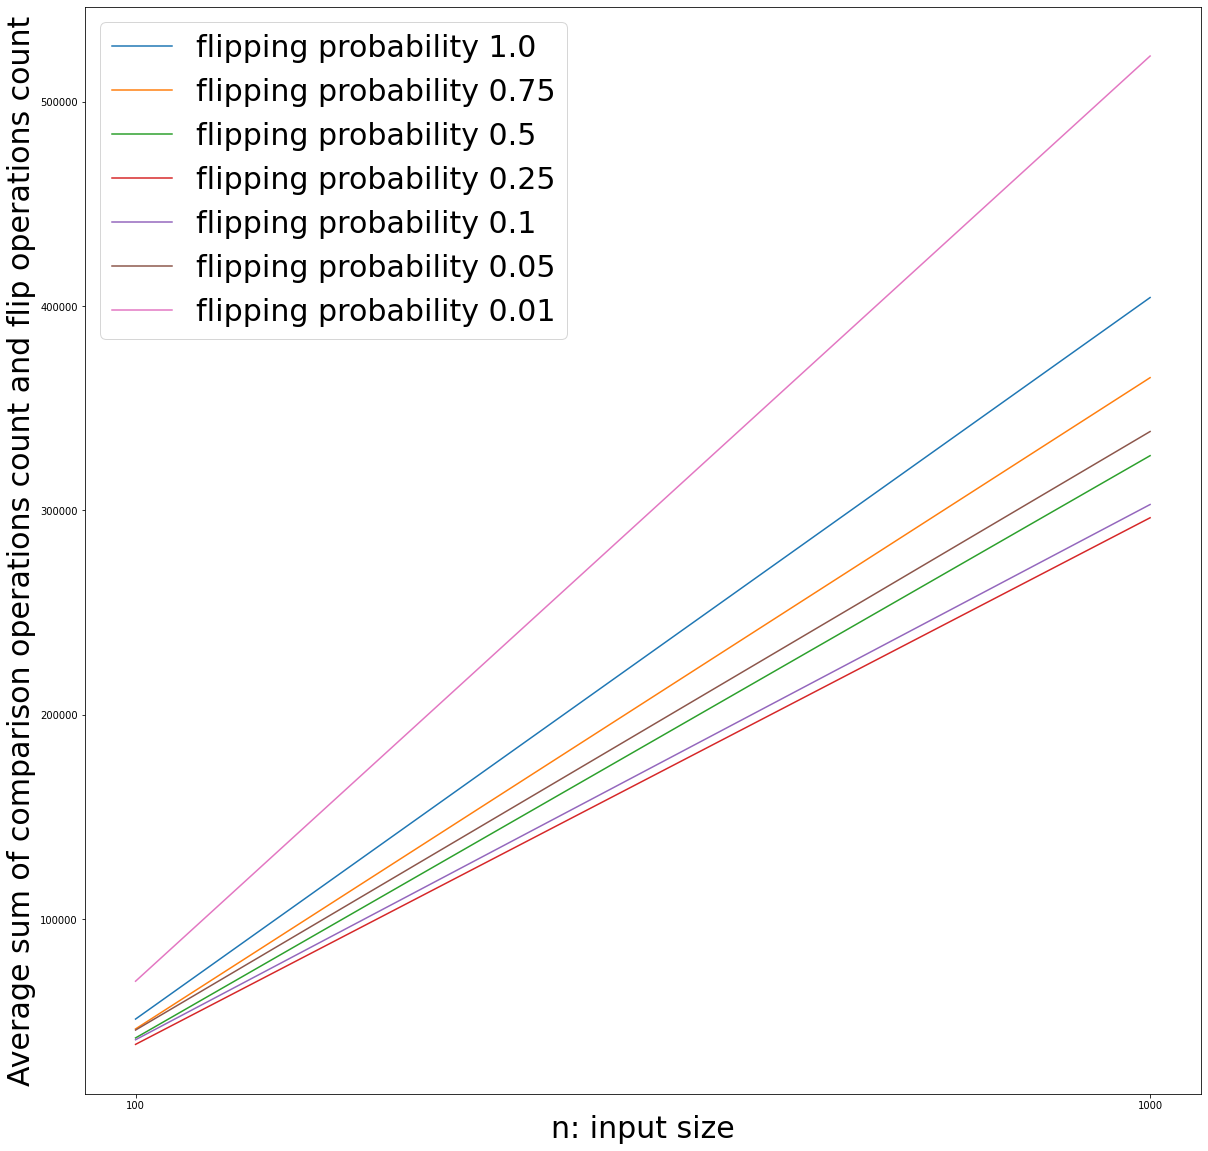

In [12]:
plt.figure(2, figsize=(20,20))
for i in range(len(flipProbabilities)):
    y = [average[i] for average in averages_sumOfComparisonsOperationsCountAndFlipOperationsCount]
    plt.plot(inputSizesAsStrings, y, label ="flipping probability {}".format(flipProbabilities[i]))
plt.xlabel('n: input size', fontsize = 30)
plt.ylabel('Average sum of comparison operations count and flip operations count', fontsize = 30)
plt.legend(prop={'size': 30})
plt.show()

<h5> Average comparison operations count </h5>

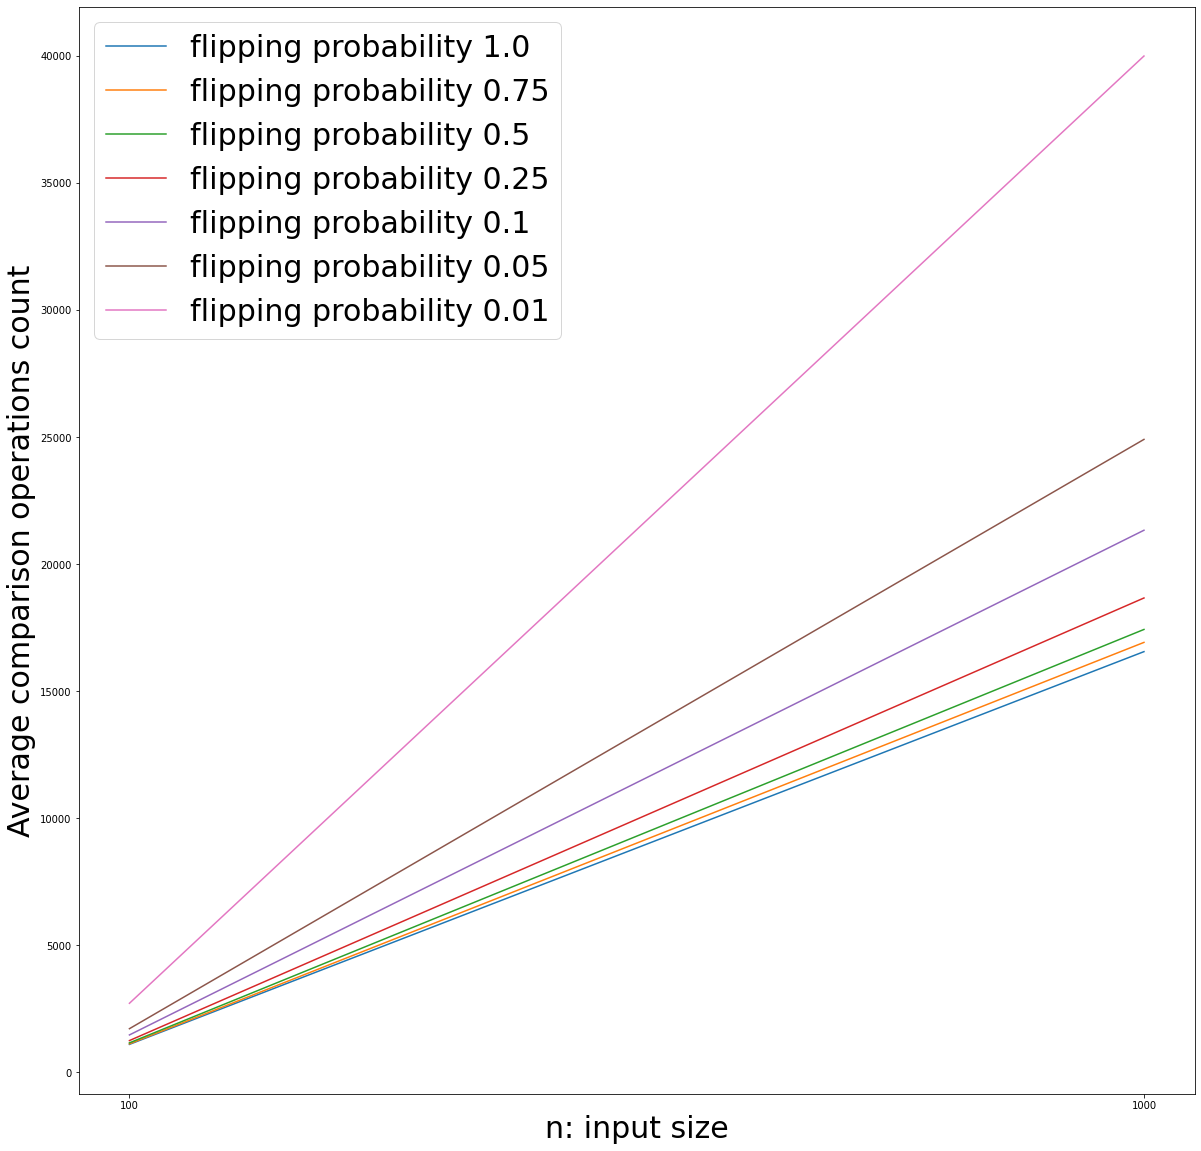

In [13]:
plt.figure(3, figsize=(20,20))
for i in range(len(flipProbabilities)):
    y = [average[i] for average in averages_comparisonsOperationsCount]
    plt.plot(inputSizesAsStrings, y, label ="flipping probability {}".format(flipProbabilities[i]))
plt.xlabel('n: input size', fontsize = 30)
plt.ylabel('Average comparison operations count', fontsize = 30)
plt.legend(prop={'size': 30})
plt.show()

<h5> Average flip operations count </h5>

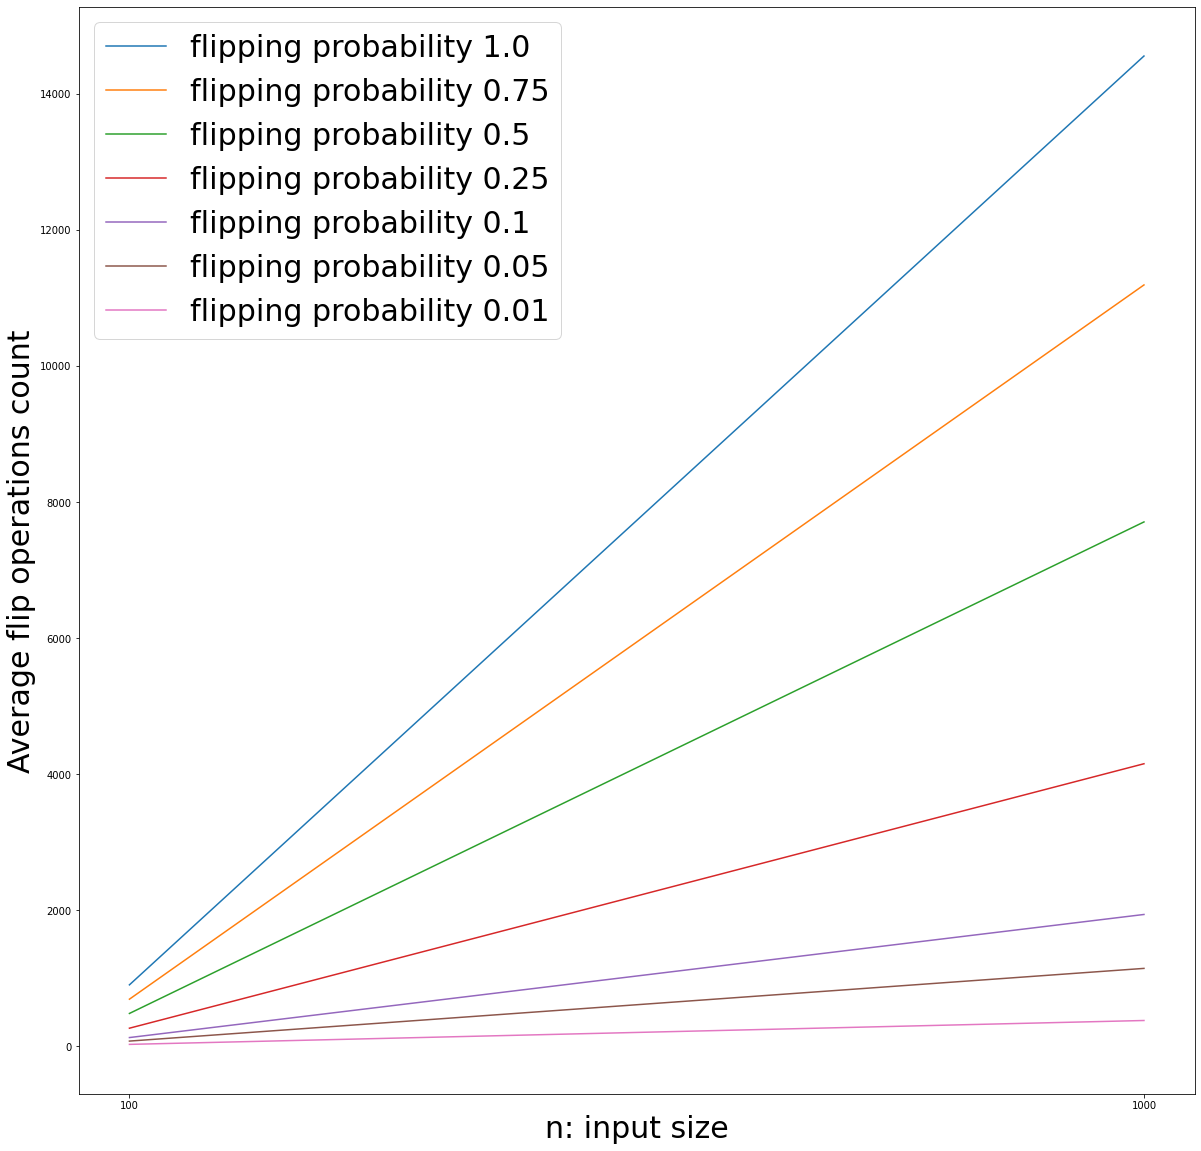

In [14]:
plt.figure(4, figsize=(20,20))
for i in range(len(flipProbabilities)):
    y = [average[i] for average in averages_flipOperationsCount]
    plt.plot(inputSizesAsStrings, y, label ="flipping probability {}".format(flipProbabilities[i]))
plt.xlabel('n: input size', fontsize = 30)
plt.ylabel('Average flip operations count', fontsize = 30)
plt.legend(prop={'size': 30})
plt.show()